In [2]:
# plot.py
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import polertiek


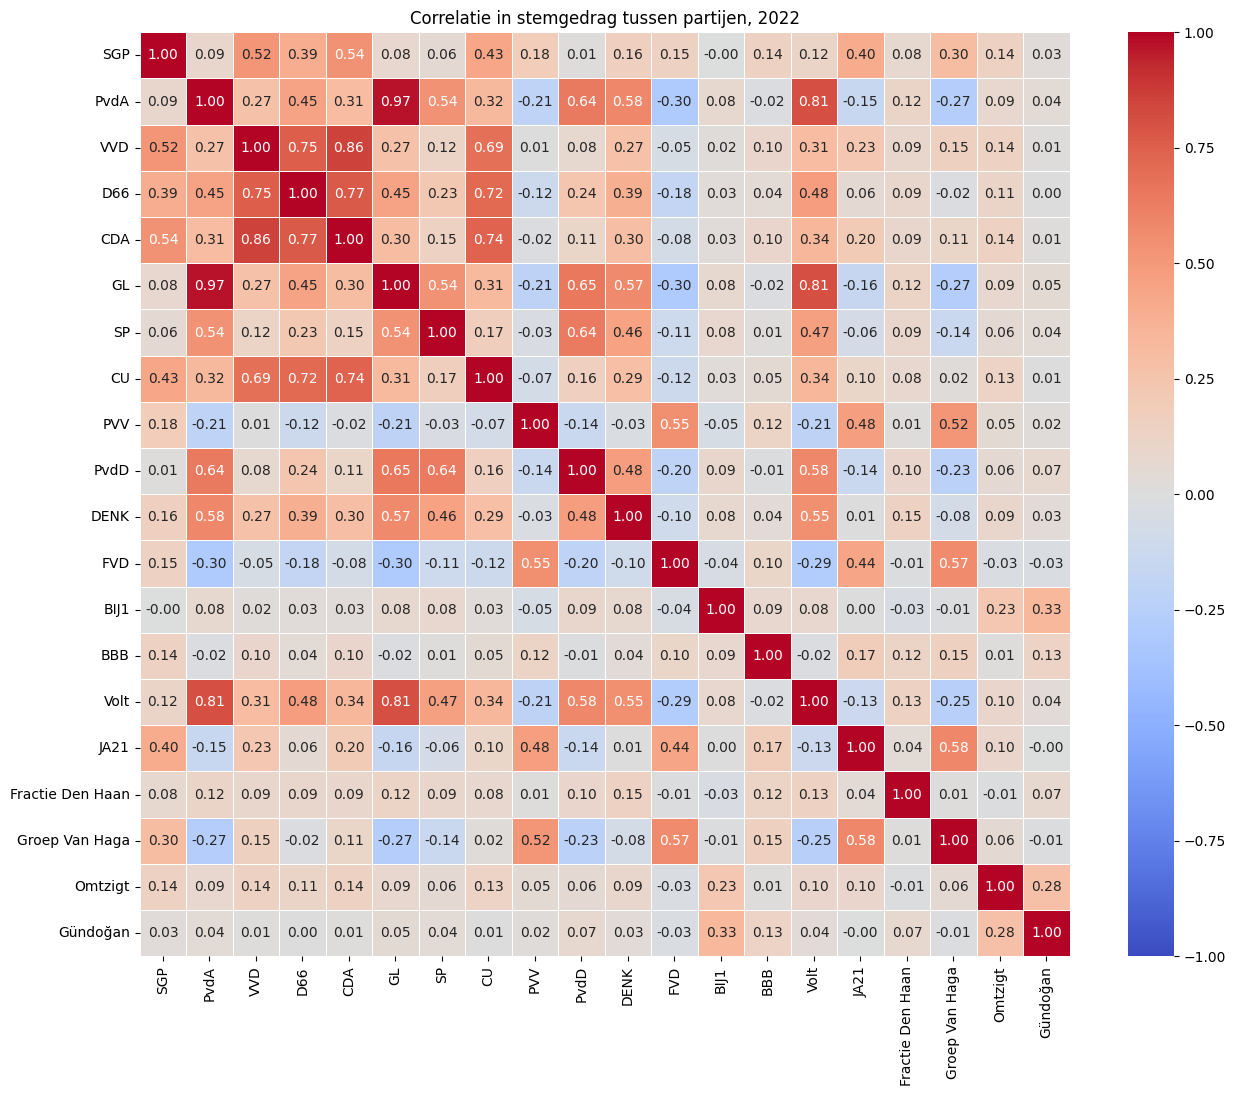

In [3]:
year = 2022
# Path to SQLite database
database_path = "../data/votes.sqlite"

# Fetch and preprocess data
df = polertiek.fetch_and_preprocess_data(database_path, year=year)

correlation_matrix_sorted = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix_sorted,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
)
plt.title(f"Correlatie in stemgedrag tussen partijen, {year}")
plt.show()


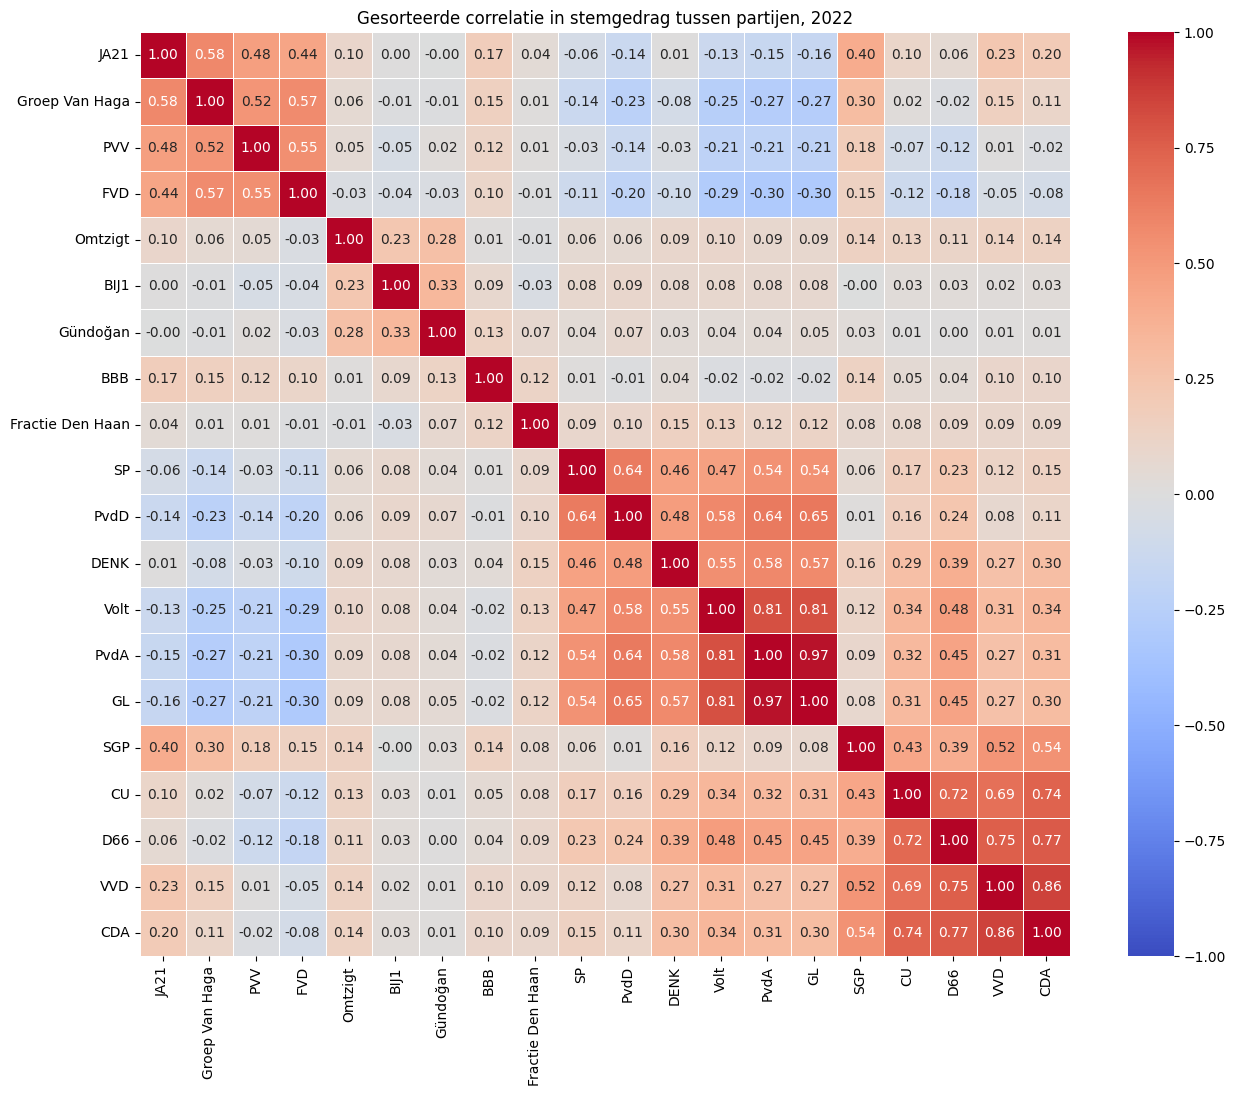

In [51]:
year = 2022
# Path to SQLite database
database_path = "../data/votes.sqlite"

# Fetch and preprocess data
df = polertiek.fetch_and_preprocess_data(database_path, year=year)

# Standardize the data
df_standardized = (df - df.mean()) / df.std()

# Hierarchical clustering
linkage_matrix = hierarchy.linkage(df_standardized.T, method="ward")

# Get the order of columns based on clustering
dendrogram = hierarchy.dendrogram(linkage_matrix, no_plot=True)
sorted_columns = df.columns[dendrogram["leaves"]]

# Reorder DataFrame columns
df_sorted = df[sorted_columns]

# Calculate the correlation matrix of the sorted DataFrame
correlation_matrix_sorted = df_sorted.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix_sorted,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
)
plt.title(f"Gesorteerde correlatie in stemgedrag tussen partijen, {year}")
plt.show()


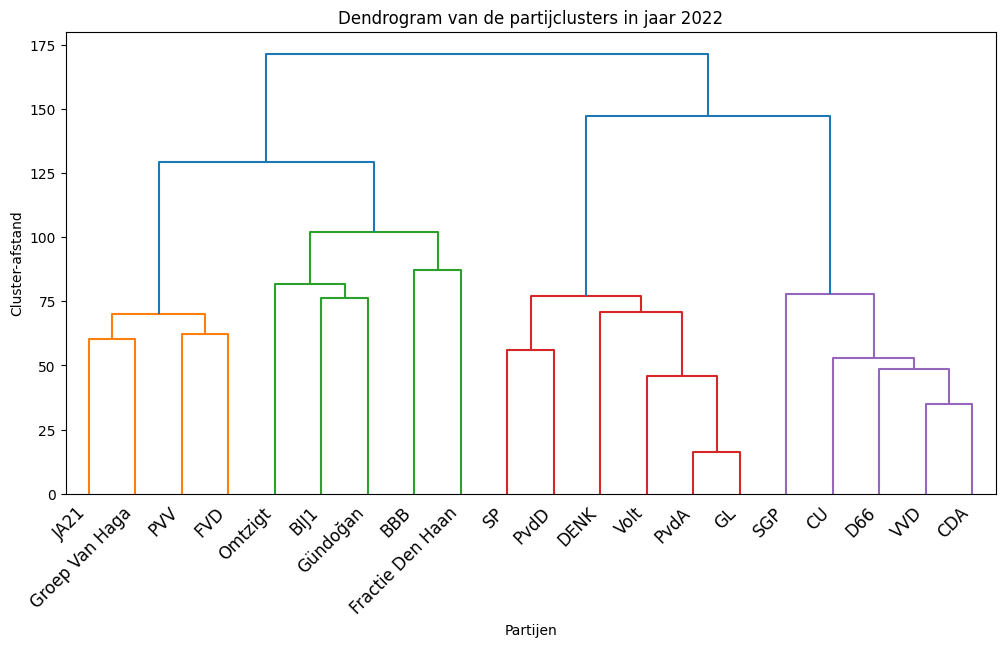

In [52]:

plt.figure(figsize=(12,6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.columns, orientation='top', no_plot=False,distance_sort=True)

plt.xlabel('Partijen')
plt.ylabel('Cluster-afstand')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

_ = plt.title(f'Dendrogram van de partijclusters in jaar {year}')


# Vroeger, ...

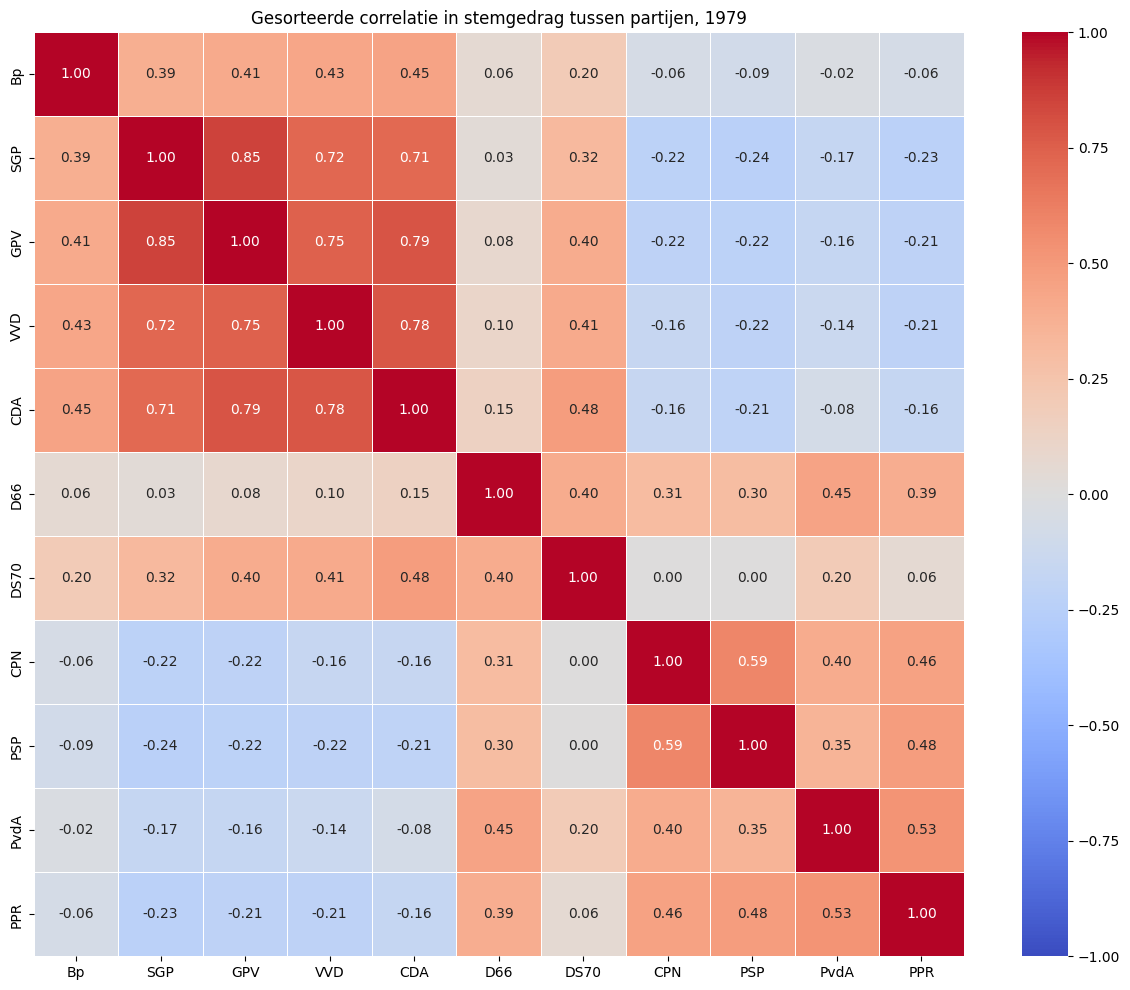

In [41]:
year = 1979
# Path to SQLite database
database_path = "../data/votes.sqlite"

# Fetch and preprocess data
df = polertiek.fetch_and_preprocess_data(database_path, year=year)

# Standardize the data
df_standardized = (df - df.mean()) / df.std()

# Hierarchical clustering
linkage_matrix = hierarchy.linkage(df_standardized.T, method="ward")

# Get the order of columns based on clustering
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.columns, orientation='top', no_plot=True)
sorted_columns = df.columns[dendrogram["leaves"]]

# Reorder DataFrame columns
df_sorted = df[sorted_columns]

# Calculate the correlation matrix of the sorted DataFrame
correlation_matrix_sorted = df_sorted.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix_sorted,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
)
plt.title(f"Gesorteerde correlatie in stemgedrag tussen partijen, {year}")
plt.show()


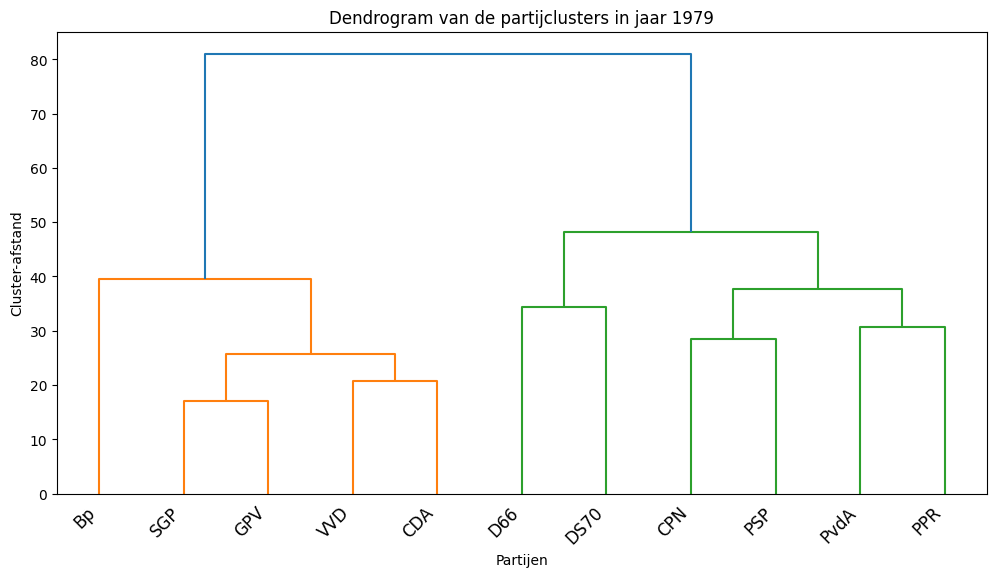

In [42]:

plt.figure(figsize=(12,6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.columns, orientation='top', no_plot=False,distance_sort=True)

plt.xlabel('Partijen')
plt.ylabel('Cluster-afstand')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

_ = plt.title(f'Dendrogram van de partijclusters in jaar {year}')
